In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

In [ ]:
"""set_len = 50
city_set = []

range(len(cities))

for x in range(0, len(cities), set_len):
    city_set.append(cities[x:x+set_len])

print(city_set[0])
"""

In [ ]:
"""city_name = []
for i in range(len(city_set)):
    for city in city_set[i]:
        city_name.append(city)

print(city_name)"""

In [3]:
# Define Imperial units as we requires Max Temperature in Fahrenheit and Wind Speed in mph
units = "imperial"

# Base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Query url with units and city name as parameter
query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

In [4]:
# Define lists to save JSON response
city_name = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
city_id = []
date = []

# Define counters to print processing logs
record_count = 1
set_count = 1

# Setting up For loop to call API and print processing log
# Since only 60 API calls can be made per min, we are creating sets of 50 cities and iterating through 
# Use time.sleep method to restrict API calls under 60 per min
# Use Try Except loop to print cities which are not in the list
# Append lists with JSON response

print("Beginning Data Retrieval\n"
      "------------------------------")

for i, city in enumerate(cities):
    if (i%50 == 0 and i>=50):
        set_count += 1
        record_count = 1
    
    query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    
    try:
        response = requests.get(query_url).json()
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        city_id.append(response["id"])
        date.append(response["dt"])
        time.sleep(0.1)
        
    except KeyError:
        print("City not found. Skipping...")
        pass

print("------------------------------\n"
      "Data Retrieval Complete\n"
      "------------------------------")

Processing Record 1 of Set 1 | coquimbo
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | faanui
Processing Record 8 of Set 1 | kuytun
Processing Record 9 of Set 1 | haines junction
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | guerrero negro
Processing Record 12 of Set 1 | khuchni
Processing Record 13 of Set 1 | roald
Processing Record 14 of Set 1 | monrovia
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | robertsport
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | mecca
Processing Record 20 of Set 1 | asau
Processing Record 21 of Set 1 | nouadhibou
Processing Record 22 of Set 1 | xiangdong
City not found. Skipping...
Processing Record 23 of Set 1 | bilibino
Processing Record 24 of Set 1 | cabra

Processing Record 41 of Set 4 | baghdad
Processing Record 42 of Set 4 | onverwacht
Processing Record 43 of Set 4 | mahon
Processing Record 44 of Set 4 | shambu
Processing Record 45 of Set 4 | saint-pierre
Processing Record 46 of Set 4 | geraldton
Processing Record 47 of Set 4 | ulladulla
Processing Record 48 of Set 4 | victor harbor
Processing Record 49 of Set 4 | vardo
Processing Record 50 of Set 4 | xining
Processing Record 1 of Set 5 | shingu
Processing Record 2 of Set 5 | samusu
City not found. Skipping...
Processing Record 3 of Set 5 | la ronge
Processing Record 4 of Set 5 | chokurdakh
Processing Record 5 of Set 5 | vestmannaeyjar
Processing Record 6 of Set 5 | port hardy
Processing Record 7 of Set 5 | takoradi
Processing Record 8 of Set 5 | college
Processing Record 9 of Set 5 | port lincoln
Processing Record 10 of Set 5 | tahta
Processing Record 11 of Set 5 | baruun-urt
Processing Record 12 of Set 5 | kazalinsk
City not found. Skipping...
Processing Record 13 of Set 5 | dosso
Pr

Processing Record 30 of Set 8 | mount isa
Processing Record 31 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 32 of Set 8 | qeshm
Processing Record 33 of Set 8 | thomasville
Processing Record 34 of Set 8 | toliary
City not found. Skipping...
Processing Record 35 of Set 8 | krasnoarmeysk
Processing Record 36 of Set 8 | ponta do sol
Processing Record 37 of Set 8 | alekseyevsk
Processing Record 38 of Set 8 | fukue
Processing Record 39 of Set 8 | tocopilla
Processing Record 40 of Set 8 | ahmadpur
Processing Record 41 of Set 8 | kiunga
Processing Record 42 of Set 8 | shihezi
Processing Record 43 of Set 8 | klaksvik
Processing Record 44 of Set 8 | boende
Processing Record 45 of Set 8 | vaxjo
Processing Record 46 of Set 8 | karakendzha
City not found. Skipping...
Processing Record 47 of Set 8 | letlhakane
Processing Record 48 of Set 8 | tura
Processing Record 49 of Set 8 | lieksa
Processing Record 50 of Set 8 | gavle
Processing Record 1 of Set 9 | sentyabrskiy
City not fo

Processing Record 16 of Set 12 | tautira
Processing Record 17 of Set 12 | salacgriva
Processing Record 18 of Set 12 | camacha
Processing Record 19 of Set 12 | ilulissat
Processing Record 20 of Set 12 | cambridge
Processing Record 21 of Set 12 | san jeronimo
Processing Record 22 of Set 12 | comandau
Processing Record 23 of Set 12 | halalo
City not found. Skipping...
Processing Record 24 of Set 12 | pasighat
Processing Record 25 of Set 12 | ciudad real
Processing Record 26 of Set 12 | vila velha
Processing Record 27 of Set 12 | yabrud
Processing Record 28 of Set 12 | sataua
City not found. Skipping...
Processing Record 29 of Set 12 | khuzhir
Processing Record 30 of Set 12 | mahibadhoo
Processing Record 31 of Set 12 | hami
Processing Record 32 of Set 12 | pitimbu
Processing Record 33 of Set 12 | mantua
Processing Record 34 of Set 12 | trincomalee
Processing Record 35 of Set 12 | palmer
Processing Record 36 of Set 12 | amalapuram
Processing Record 37 of Set 12 | chernaya kholunitsa
Process

### Convert Raw Data to DataFrame

In [6]:
# Create Dataframe from JSON response
cities_weather_df = pd.DataFrame({"City": city_name,
                               "Lat": lat, 
                               "Lng": lon, 
                               "Max Temp": max_temp, 
                               "Humidity": humidity, 
                               "Cloudiness": cloudiness, 
                               "Wind Speed": wind_speed, 
                               "Country": country,
                               "Date": date})
cities_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coquimbo,-29.9533,-71.3436,58.73,72,0,9.22,CL,1627247120
1,Hilo,19.7297,-155.0900,82.80,83,90,4.61,US,1627246524
2,Punta Arenas,-53.1500,-70.9167,37.11,71,29,11.88,CL,1627246954
3,Hobart,-42.8794,147.3294,45.23,70,20,1.99,AU,1627246872
4,Cape Town,-33.9258,18.4232,61.12,53,99,7.65,ZA,1627247122
...,...,...,...,...,...,...,...,...,...
575,Saint-Ambroise,48.5501,-71.3324,73.89,87,49,0.85,CA,1627247329
576,Banda Aceh,5.5577,95.3222,79.66,83,96,7.45,ID,1627247330
577,Lithgow,-33.4833,150.1500,42.87,90,76,15.08,AU,1627247330
578,Chapais,49.7834,-74.8492,62.38,54,94,9.86,CA,1627247330


In [14]:
# Save Dataframe as CSV file for future reference
cities_weather_df.to_csv("../output_data/cities.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.

In [15]:
# Get stats of all the numeric values for the dataframe
cities_weather_stats = cities_weather_df.describe()
cities_weather_stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,19.934006,17.339947,70.411293,69.339655,53.632759,7.839948,1.627247e+09
std,32.886291,91.928697,14.913808,20.869944,38.882418,5.248213,1.014808e+02
min,-54.800000,-179.166700,34.930000,4.000000,0.000000,0.000000,1.627247e+09
25%,-7.805725,-67.520825,58.792500,59.000000,11.000000,4.000000,1.627247e+09
50%,26.169450,21.060700,71.680000,74.000000,61.000000,6.440000,1.627247e+09
75%,45.584225,100.340125,80.715000,85.000000,95.000000,10.495000,1.627247e+09
max,78.218600,179.316700,107.510000,100.000000,100.000000,28.770000,1.627247e+09


In [46]:
# Calculate indices of cities where Humidity is above 100
humidity_outliers = cities_weather_df.loc[cities_weather_df["Humidity"] > 100].index
humidity_outliers

Int64Index([], dtype='int64')

In [19]:
# Create new dataframe by dropping all humidity outliers by index
clean_city_data = cities_weather_df.drop(humidity_outliers, inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coquimbo,-29.9533,-71.3436,58.73,72,0,9.22,CL,1627247120
1,Hilo,19.7297,-155.0900,82.80,83,90,4.61,US,1627246524
2,Punta Arenas,-53.1500,-70.9167,37.11,71,29,11.88,CL,1627246954
3,Hobart,-42.8794,147.3294,45.23,70,20,1.99,AU,1627246872
4,Cape Town,-33.9258,18.4232,61.12,53,99,7.65,ZA,1627247122
...,...,...,...,...,...,...,...,...,...
575,Saint-Ambroise,48.5501,-71.3324,73.89,87,49,0.85,CA,1627247329
576,Banda Aceh,5.5577,95.3222,79.66,83,96,7.45,ID,1627247330
577,Lithgow,-33.4833,150.1500,42.87,90,76,15.08,AU,1627247330
578,Chapais,49.7834,-74.8492,62.38,54,94,9.86,CA,1627247330


## Plotting the Data

In [112]:
# Define function for Scatter Plots

def scatter_plot (y_axis_col, ylabel_name):
    # Define x_axis and y_axis for scatter plot 
    x_axis = clean_city_data["Lat"]
    y_axis = clean_city_data[y_axis_col]

    plt.scatter(x_axis, y_axis, edgecolors='black')

    # Labels and Titles for the plot
    # using date.today to display current date
    plt.xlabel("Latitude")
    plt.ylabel(ylabel_name)
    plt.title(f"City Latitude vs. {y_axis_col} ({date.today().strftime('%d/%m/%Y')})")

    # Saving scatter plot graph as png
    #plt.savefig(f"../output_data/{y_axis_col}_scatterplot.png")

    # Plot gridlines
    plt.grid(True)

    # Display plot
    plt.show()

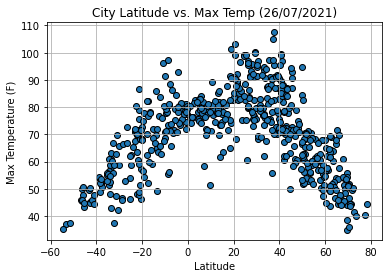

In [113]:
# Latitude vs. Temperature Scatter Plot
scatter_plot("Max Temp", "Max Temperature (F)")

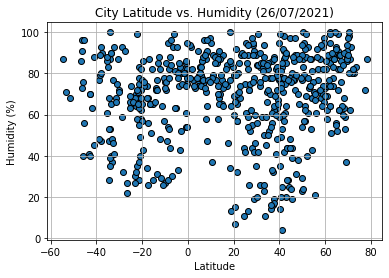

In [114]:
# Latitude vs. Humidity Scatter Plot
scatter_plot("Humidity", "Humidity (%)")

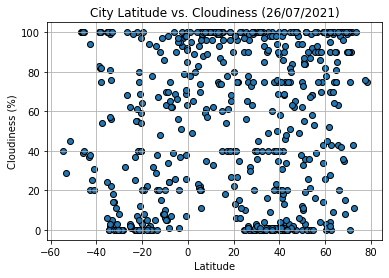

In [115]:
# Latitude vs. Cloudiness Scatter Plot
scatter_plot("Cloudiness", "Cloudiness (%)")

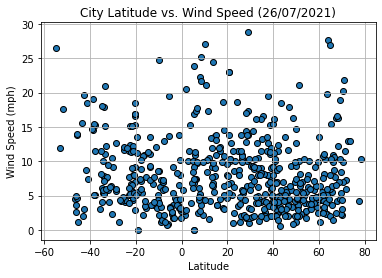

In [116]:
# Latitude vs. Wind Speed Scatter Plot
scatter_plot("Wind Speed", "Wind Speed (mph)")

In [ ]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_axis,y_axis)

# Line equation to find Predcited winning percentages
regress_value = slope*x_axis + intercept

# Line equation to print on the scatter plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Line plot for regerssion line
plt.plot(x_axis,regress_value, "r-")

# Display regression line
plt.annotate(line_eq,(-40,20), fontsize=14, color="red")

In [ ]:
except:
        print("City not found. Skipping...")
        pass